# Análisis y exploración de datos de Pokémon

En este trabajo se presenta una serie de análisis y visualizaciones de los datos de la saga de juegos de Pokémon, desde la primera generación (1996) hasta la sexta (2013)

## Librerías necesarias para el notebook

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

%matplotlib inline
sns.set()

## Lectura y descripción de los datos

El dataset contiene los nombres de los Pokémon junto a sus 6 estadísticas principales, la generación y si es o no legendario.

Es importante tener en cuenta que, a lo largo que el juego ha ido evolucionando, distintos Pokémon sufren una serie de cambios, los cuáles no están contemplados en los datos. Coomo ejemplo, todo los Pokémon con el prefijo 'Mega' no tienen aparición hasta la sexta generación, aunque en los datos vemos a Mega Venusaur en la generación 1, ya que Venusaur sí es de dicha generación.

Este mismo caso sucede con los tipos 1 y 2 de Pokémon 'Fairy' o 'Hada'.

In [78]:
df = pd.read_csv('pokemon.csv')
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


En la información de los datos se observa que hay dos columnas con nulos. Mientras que la de 'Type 2' tiene sentido que así sea, ya que no todo Pokémon disponde de dos tipos, existe un nombre de Pokémon desaparecido.

In [80]:
df[df['Name'].isnull()]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


Con un poco de conocimineto del problema, se puede averiguar que el Pokémon carente de nombre es Primeape, el cuál introduciremos en los datos.

![caption](primeape.png)

In [81]:
df['Name'][df['Name'].isnull()] = 'Primeape'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


<ipython-input-81-62600f837c3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name'][df['Name'].isnull()] = 'Primeape'


## Análisis y exploración de los Pokémon en base a su/s tipo/s

Comenzando con la exploración de Pokémon por tipo, se encuentra que existen 18 de ellos en total.

In [82]:
types_1_count = df['Type 1'].nunique()
types_2_count = df['Type 2'].nunique()
print(f'Types 1 count: {types_1_count}, Types 2 count: {types_2_count}')

Types 1 count: 18, Types 2 count: 18


Por otra parte, los juegos poseen la cantidad de 386 Pokémon monotipo y 414 de tipo dual, que se correponden con un 48.2% y un 51.7% del total, respectivamente.

In [83]:
pokemon_monotype_count = df['Type 2'].isna().sum()
pokemon_dualtype_count = len(df.index) - pokemon_monotype_count
print(f'Monotype count: {pokemon_monotype_count}, Dual type count: {pokemon_dualtype_count}')

Monotype count: 386, Dual type count: 414


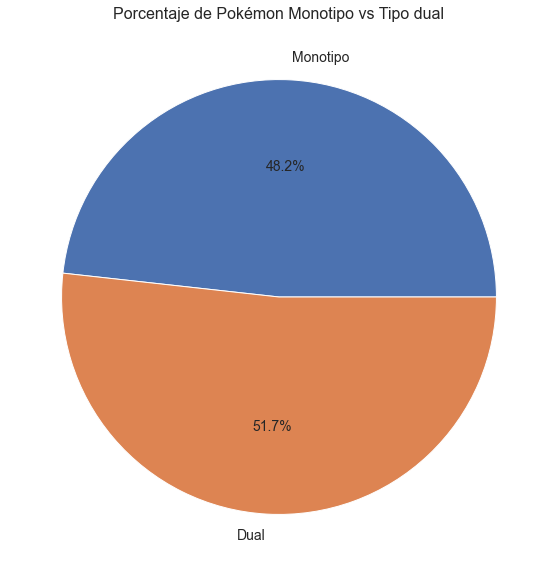

In [84]:
pie, ax = plt.subplots(figsize=(10, 10))
labels = ['Monotipo', 'Dual']
plt.pie(x=[pokemon_monotype_count, pokemon_dualtype_count], autopct="%.1f%%", labels=labels, textprops={'fontsize': 14})
plt.title("Porcentaje de Pokémon Monotipo vs Tipo dual", fontsize=16);

Este diccionario de Python permite colorear la gráficas de tipo de manera similar a los colores del juego.

In [85]:
types_palette = {
    'Grass': 'lawngreen',
    'Fire': 'orangered',
    'Water': 'lightskyblue',
    'Bug': 'olivedrab',
    'Normal': 'lightgray',
    'Poison': 'mediumorchid',
    'Electric': 'yellow',
    'Ground': 'wheat',
    'Fairy': 'magenta',
    'Fighting': 'darksalmon',
    'Psychic': 'mediumpurple',
    'Rock': 'peru',
    'Ghost': 'indigo',
    'Ice': 'lightsteelblue',
    'Dragon': 'purple',
    'Dark': 'maroon',
    'Steel': 'lightgrey',
    'Flying': 'deepskyblue',
    'None': 'whitesmoke'
}


Comenzando con el primer tipo de Pokémon, se peude apreciar en la gráfica inferior que el tipo en mayor cantidad es el tipo Agua, mientras que el de menor cantidad es Volador.

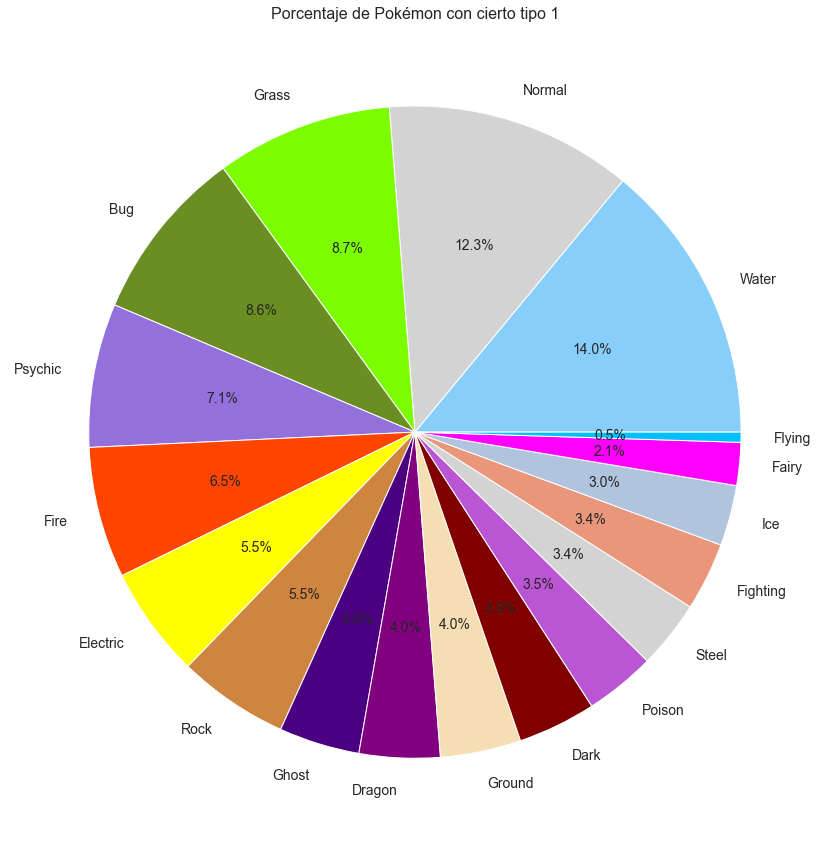

In [86]:
pie, ax = plt.subplots(figsize=(15, 15))

colors = [types_palette[x] for x in df['Type 1'].value_counts().index]

labels = df['Type 1'].unique()
plt.pie(x=df['Type 1'].value_counts(), autopct="%.1f%%", labels=df['Type 1'].value_counts().index, textprops={'fontsize': 14}, colors=colors)
plt.title("Porcentaje de Pokémon con cierto tipo 1", fontsize=16);

Por otra parte, está el segundo tipo de los Pokémon. Para que Pandas cuente con los nulos, ya que tienen significado en esta ocasión, se sustituyen por 'None' en una copia de los datos originales.

La gráfica muestra que casi la mitad de los Pokémon son monotipo, concordando con datos previamente visualizados. Además de esto, el tipo predominante pasa a ser Volador, mientras que el menos usado es Bicho.

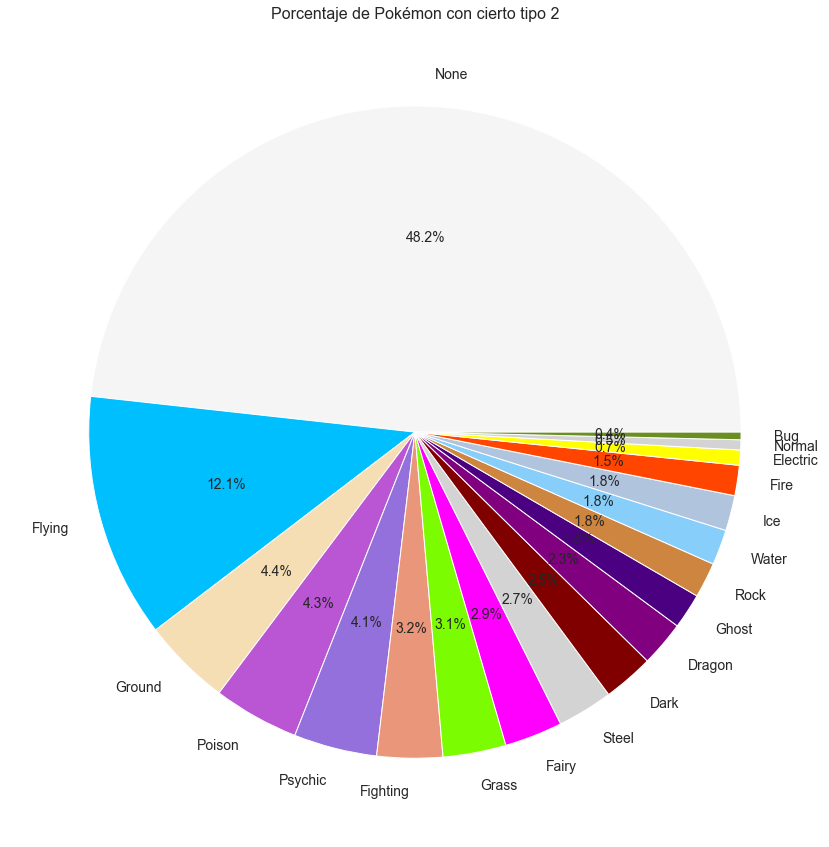

In [87]:
df_not_nan = df.copy()
df_not_nan.fillna('None', inplace=True)

colors = [types_palette[x] for x in df_not_nan['Type 2'].value_counts().index]

pie, ax = plt.subplots(figsize=(15, 15))
labels = df_not_nan['Type 2'].unique()
plt.pie(x=df_not_nan['Type 2'].value_counts(), autopct="%.1f%%", labels=df_not_nan['Type 2'].value_counts().index, textprops={'fontsize': 14}, colors=colors)
plt.title("Porcentaje de Pokémon con cierto tipo 2", fontsize=16);

A continuación, se grafica cada tipo primario con la cantidad de tipos secundarios que tiene. Los casos que pueden llamar bastante la atención son los de tipo primario Hada y Volador.
Mientras que el primero sólo tiene dos casos de tipo doble con Volador, el segundo tiene únciamente dos casos duales con drágon y otros dos monotipo.

Además de esto, se puede observar que existen ciertos tipos muy comunes como secundarios a otro tipo, como son el tipo 1 Bicho con el tipo 2 Volador.

<ipython-input-88-f8b78a9fb6e1>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  leg = fig.legend(plots, labels=df_aux['Type 1'].unique(), loc="center right", title="Types" )


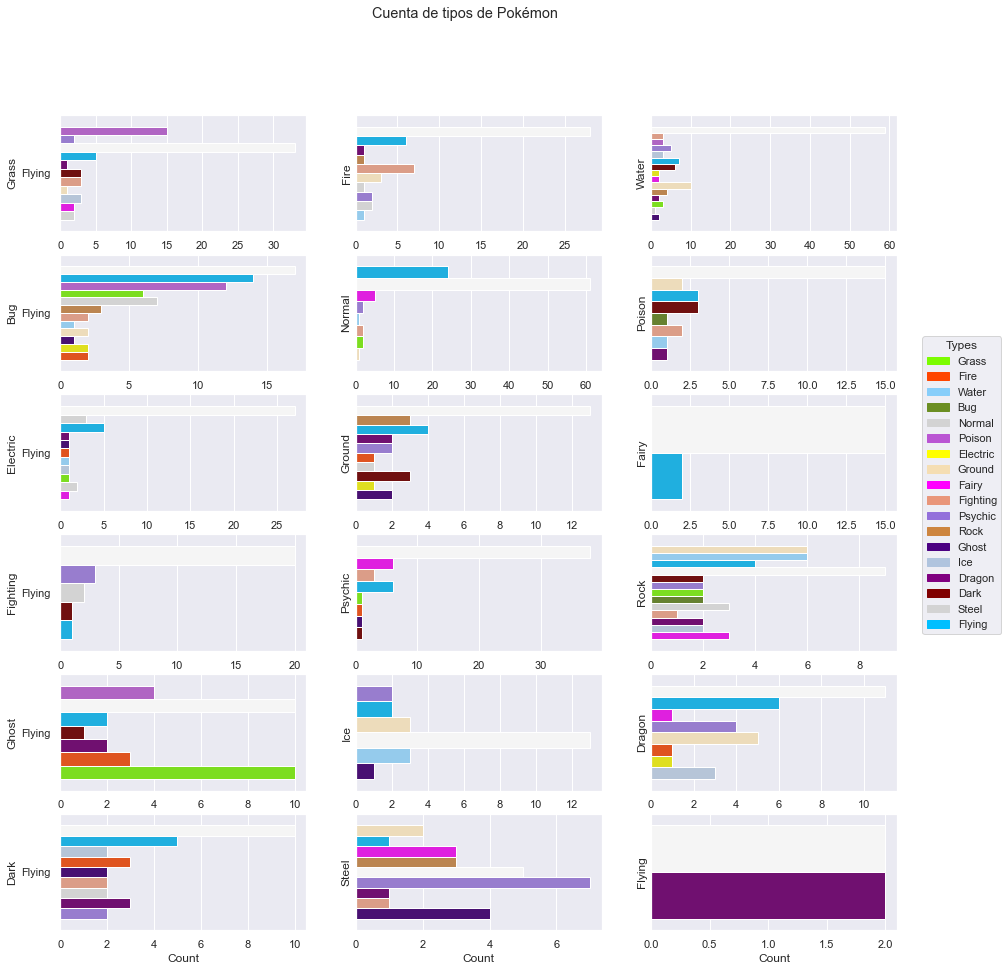

In [88]:
df_aux = df.copy()
df_aux.fillna('None', inplace=True)

fig, axes = plt.subplots(6, 3, figsize=(15, 15), sharey=True)
fig.suptitle('Cuenta de tipos de Pokémon')

types = df_aux['Type 1'].unique()
plots = []

for i in range(0, 6):
    for j in range(0, 3):
        p = df_aux[df_aux['Type 1'] == types[3 * i + j] ]
        plot = sns.countplot(data=p, y='Type 1',hue='Type 2', ax=axes[i, j], palette=types_palette)
        plot.set(xlabel='Count', ylabel=types[3 * i + j])
        axes[i, j].get_legend().remove()
        plots.append(plot)
        
leg = fig.legend(plots, labels=df_aux['Type 1'].unique(), loc="center right", title="Types" )

for i, item in zip(leg.legendHandles, types_palette):
    i.set_color(types_palette[item])

La siguiente evaluación de tipos se realiza sobre las distintas generaciones de los juegos. En la gráfica inferior observamos que la cantidad de Pokémon nuevos introducidos en cada generación es menor.

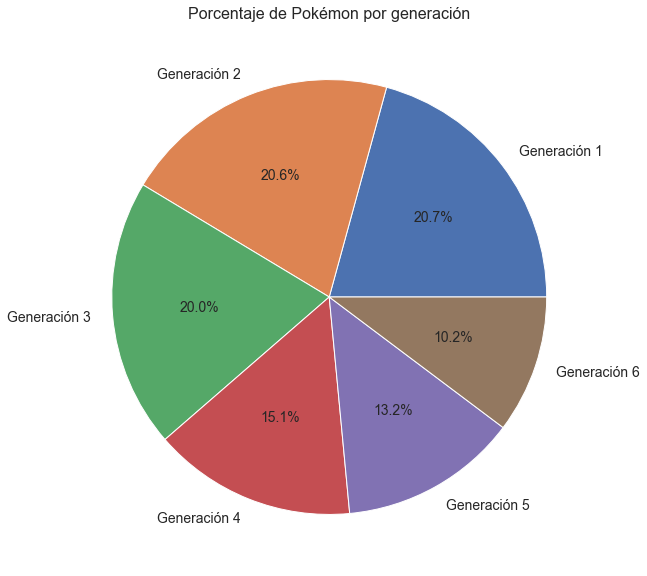

In [89]:
pie, ax = plt.subplots(figsize=(10, 10))
labels = ['Generación ' +  str(x) for x in df['Generation'].unique()]
plt.pie(x=df['Generation'].value_counts(), autopct="%.1f%%", labels=labels, textprops={'fontsize': 14})
plt.title("Porcentaje de Pokémon por generación", fontsize=16);

Con el conocmiento de porcentaje de cantidad de Pokémon por generación, se prosigue graficando la cantidad de tipos existentes en cada una de dichas generaciones.

Para los tipo 1, un comportamiento que sobresale bastante es la gran cantidad de tipo Agua en la mayoría de generaciones.

Otro factor visible en la gráfica es la gran cantidad de tipos Hada en la generación 6 (que como se mencionó en la introducción al trabajo, es cuando realmente aparecieron en el juego). De manera similar, sucede con el tipo Siniestro (Dark), que se introdujo en la segunda generación.

<ipython-input-90-141d28f548a5>:11: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  leg = fig.legend(plots, labels=df['Type 1'].unique(), loc="center right", title="Types" )


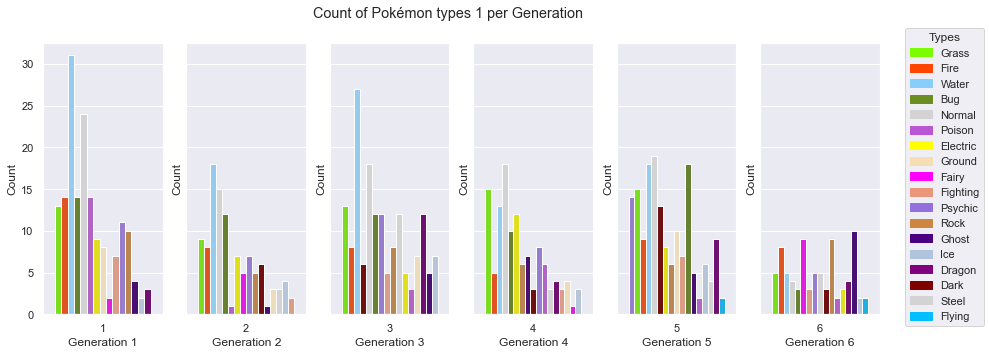

In [90]:
fig, axes = plt.subplots(1, 6, figsize=(15, 5), sharey=True)
fig.suptitle('Count of Pokémon types 1 per Generation')

for i in range(1, 7):
        p = df[df['Generation'] == i]
        plot = sns.countplot(data=p, x='Generation', hue='Type 1', ax=axes[i-1], palette=types_palette)
        plot.set(xlabel=f'Generation {i}', ylabel='Count')
        axes[i-1].get_legend().remove()
        plots.append(plot)
        
leg = fig.legend(plots, labels=df['Type 1'].unique(), loc="center right", title="Types" )

for i, item in zip(leg.legendHandles, types_palette):
    i.set_color(types_palette[item])

En cambio, para el tipo 2, el tipo predominante es Volador durante la mayoría de generaciones. En esta ocasión, el tipo Hada se realza en más generaciones. Esto se debe a que dicho tipo fue añadido como tipo secundario de algunos tipos Normal de otras generaciones.

<ipython-input-91-c54aef6bfb12>:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  leg = fig.legend(plots, labels=df_not_nan['Type 2'].unique(), loc="center right", title="Types" )


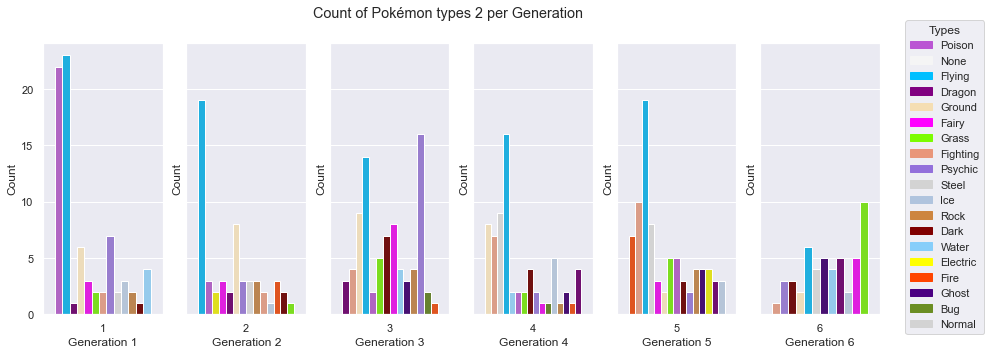

In [91]:
df_not_nan = df.copy()
df_not_nan.fillna('None', inplace=True)

fig, axes = plt.subplots(1, 6, figsize=(15, 5), sharey=True)
fig.suptitle('Count of Pokémon types 2 per Generation')

for i in range(1, 7):
        p = df[df['Generation'] == i]
        plot = sns.countplot(data=p, x='Generation', hue='Type 2', ax=axes[i-1], palette=types_palette)
        plot.set(xlabel=f'Generation {i}', ylabel='Count')
        axes[i-1].get_legend().remove()
        plots.append(plot)
        
leg = fig.legend(plots, labels=df_not_nan['Type 2'].unique(), loc="center right", title="Types" )

for i, item in zip(leg.legendHandles, df_not_nan['Type 2'].unique()):
    i.set_color(types_palette[item])

## Análisis y exploración de las estadísticas base de los Pokémon

A continuación, se realiza un estudio sobre las estadísticas bases de los Pokémon. Con el fin de que conectar el aparatadoa nterior con este, se comienza realizando un diagrama de cajas y bigotes de las estadísticas por tipo, tanto el tipo 1 como el tipo 2.

In [92]:
stats = df.iloc[:, 4:10]
stats.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


Comenzando con el HP o Puntos de Salud, en la gráfica inferior se aprecia que el tipo 1 con mayor HP de mediana es Dragón, aunque los tipos Normal y Agua disponden de un extremo superior (o bigote supeior) más elevado.
Además, el tipo Normal presenta una serie de de valores superiores atípicos mayores que cualquier otro tipo.

Por otra parte, el tipo 2 con mejores valores de HP resulta ser Hielo de manera bastante contundente, seguido del tipo Eléctrico.

De manera bastante particular, el tipo Bicho se encuentra en lso valores más bajo, ya sea para el tipo 1 o 2.

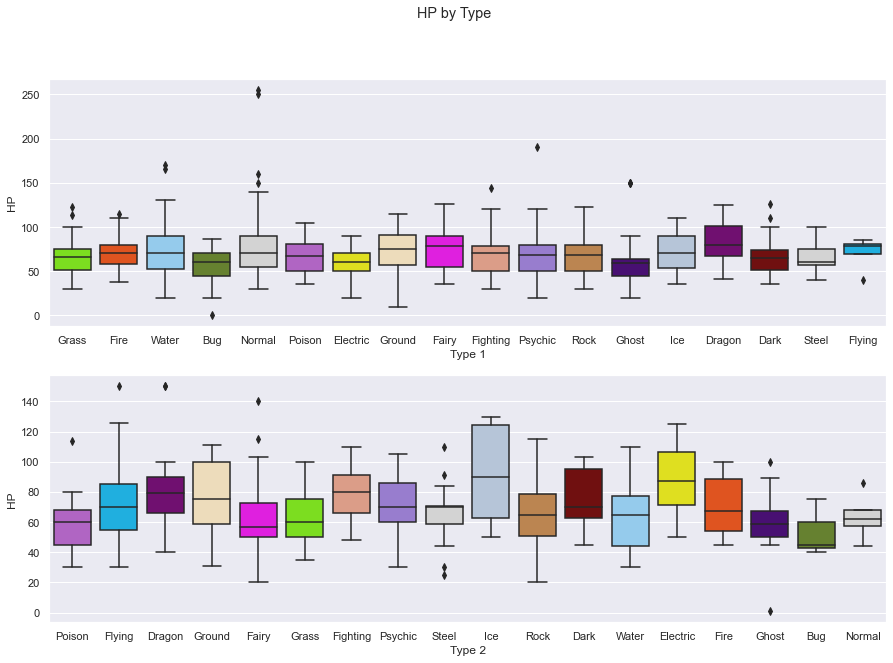

In [93]:
fig, axes = plt.subplots(2, figsize = (15,10))
plt.suptitle('HP by Type')
sns.boxplot(data=df, x='Type 1', y='HP', ax=axes[0], palette=types_palette)
sns.boxplot(data=df, x='Type 2', y='HP', ax=axes[1], palette=types_palette)

La siguiente estadísticas es Attack, referida al daño físico que puede realizar un Pokémon.

Los tipo 1 que presentan mejores valores de ataque son Dragón, Lucha, Roca y Tierra. En el caso más concreto del tipo Tierra, aunque presenta menor mediana que otros como Acero o Siniestro, su bigote superior es el más elevado de todos, otorgándole cierta compensación.

Para el tipo 2, los tipo Lucha y Siniestro son los predominantes.

Finalmente, se puede decir que los tipo Hada y Psíquico son los que peor estadística tienen.

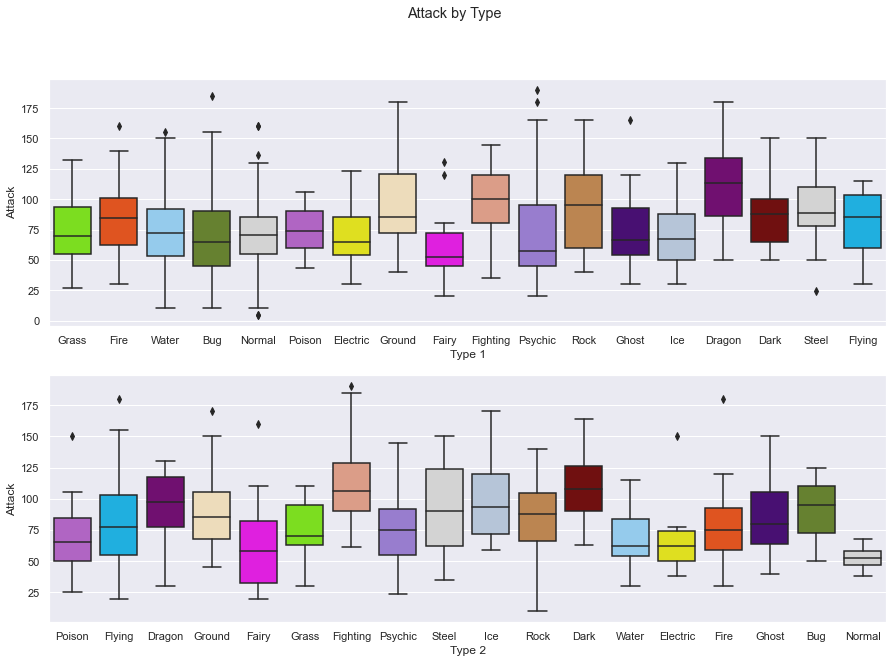

In [94]:
fig, axes = plt.subplots(2, figsize = (15,10))
plt.suptitle('Attack by Type')
sns.boxplot(data=df, x='Type 1', y='Attack', ax=axes[0], palette=types_palette)
sns.boxplot(data=df, x='Type 2', y='Attack', ax=axes[1], palette=types_palette)

Continuando con la estadística Defense, es el valor que se aplica en un combate para contrarrestar el Attack.

El tipo indiscutiblemente con mejor defensa como tipo 1 es Acero, seguido de Roca, mientras que para el tipo 2 es al revés.

El tipo 1 y 2 con peor defensa física es Normal.

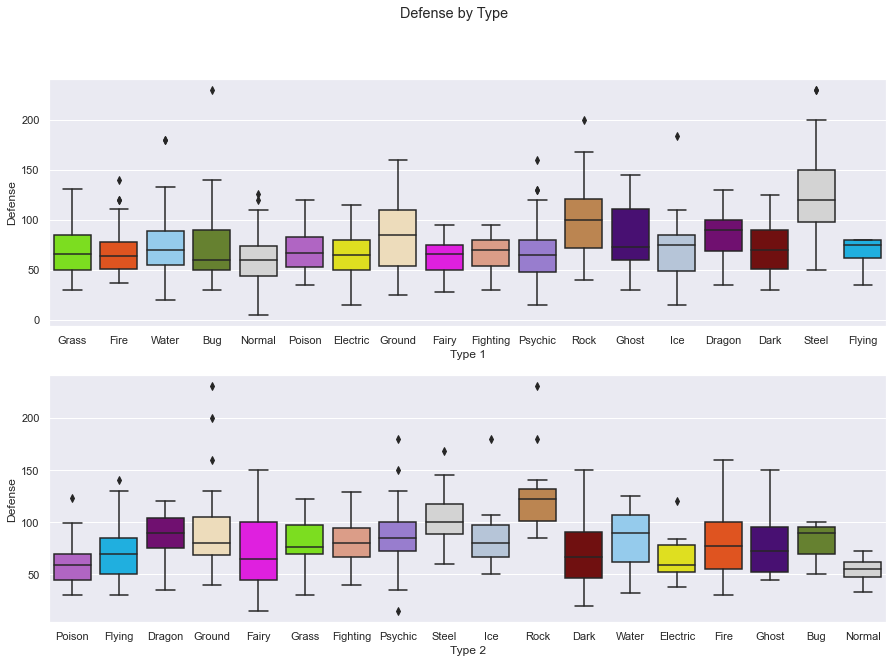

In [95]:
fig, axes = plt.subplots(2, figsize = (15,10))
plt.suptitle('Defense by Type')
sns.boxplot(data=df, x='Type 1', y='Defense', ax=axes[0], palette=types_palette)
sns.boxplot(data=df, x='Type 2', y='Defense', ax=axes[1], palette=types_palette)

A continuación, la estadística Sp. Attack define un tipo de daño alternativo al Attack, que representa daño mágico. 

Los tipos 1 con mejor valor para esta estadítica son Dragón, Volador, Psíquico y Eléctrico, mientras que como tipo 2 resaltan más Dragón, Fuego y Psíquico.

Como tipo 1, Lucha tiene el valor más bajo y como tipo 2, Bicho.

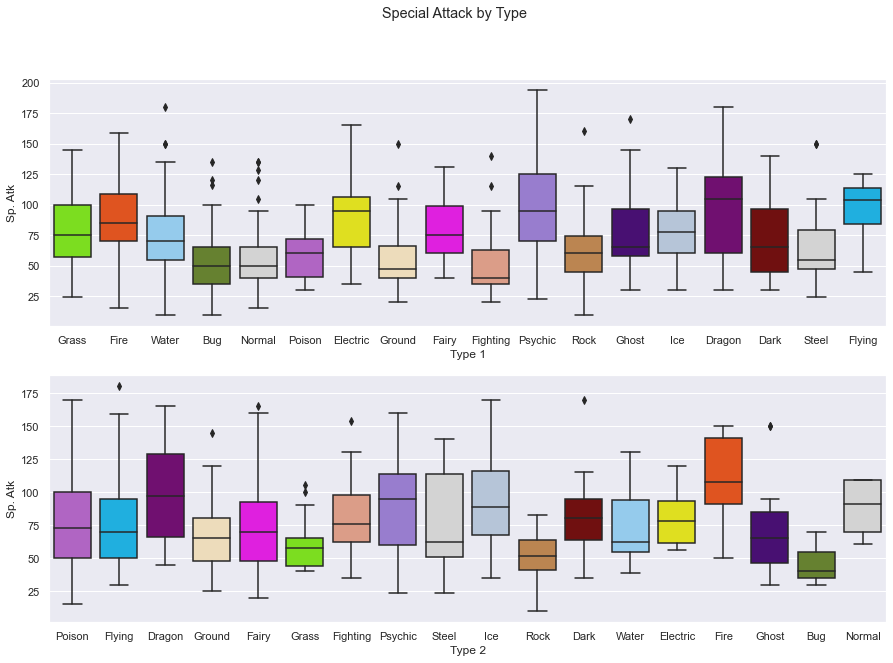

In [96]:
fig, axes = plt.subplots(2, figsize = (15,10))
plt.suptitle('Special Attack by Type')
sns.boxplot(data=df, x='Type 1', y='Sp. Atk', ax=axes[0], palette=types_palette)
sns.boxplot(data=df, x='Type 2', y='Sp. Atk', ax=axes[1], palette=types_palette)

La siguiente estadística es Sp. Defense, que de la misma manera que Defense, se opone al Sp. Attack en combate.

Los mejores tipos 1 en esta ocasión son Dragón, Hada y Psíquico, mientras que como tipo 2 lo son Hada, Psíquico y Hielo.

Bicho no presenta unos buenos valores.

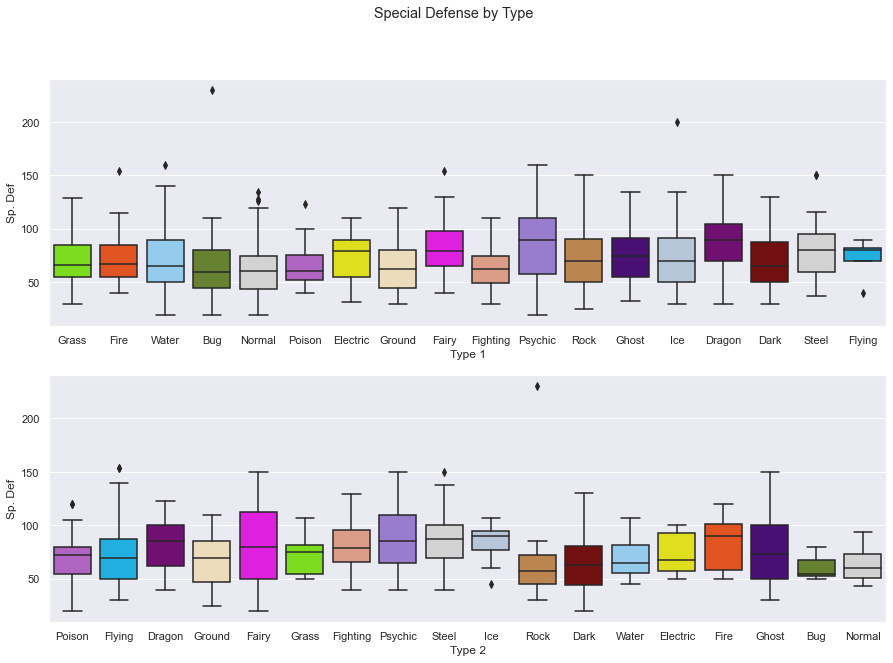

In [97]:
fig, axes = plt.subplots(2, figsize = (15,10))
plt.suptitle('Special Defense by Type')
sns.boxplot(data=df, x='Type 1', y='Sp. Def', ax=axes[0], palette=types_palette)
sns.boxplot(data=df, x='Type 2', y='Sp. Def', ax=axes[1], palette=types_palette)

La útima estadística, Speed, define qué Pokémon será el primero en atacar (existiendo ciertas excepciones en los jeugos que no vamos a tratar).

Como tipo 1, el ganador en esta ocasión es Volador, aunque Psíquico, Eléctrico y Dragón tiene muy buenos valores.

En los tipos 2, Normal, Fuego y Lucha se anteponen a alguno de los mencionados previamente.

En los peores valores destacan Roca Y Hada.

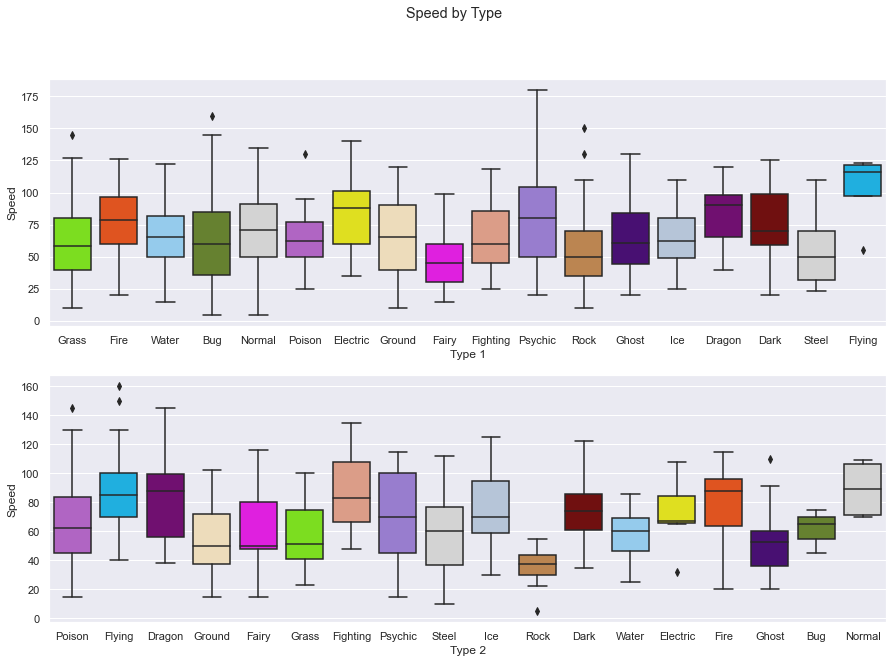

In [98]:
fig, axes = plt.subplots(2, figsize = (15,10))
plt.suptitle('Speed by Type')
sns.boxplot(data=df, x='Type 1', y='Speed', ax=axes[0], palette=types_palette)
sns.boxplot(data=df, x='Type 2', y='Speed', ax=axes[1], palette=types_palette)

Tras este análisis de cada tipo y estadísticas, se considera de interés mostrar las estadíticas de aquellos Pokémon que sobresalen en cada una de ellas. Como ejemplo, vemos que la media de HP es 69.26 aproximadamente, pero hay algún Pokémon con 255.

In [99]:
df['Total'] = df.iloc[:, 4:10].sum(axis=1)
df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,435.10250
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,119.96304
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,180.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,330.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,450.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,515.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,780.00000


Esta función se obtuvo de la documentación de matplotlib en el siguiente enlace: https://matplotlib.org/3.2.1/gallery/specialty_plots/radar_chart.html

Esta función permite generar muy cómodamente un subplot con gráficas de radar, mostradas a continuación.

In [100]:
def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

Text(0.5, 0.98, 'Pokémon con mejor estadística')

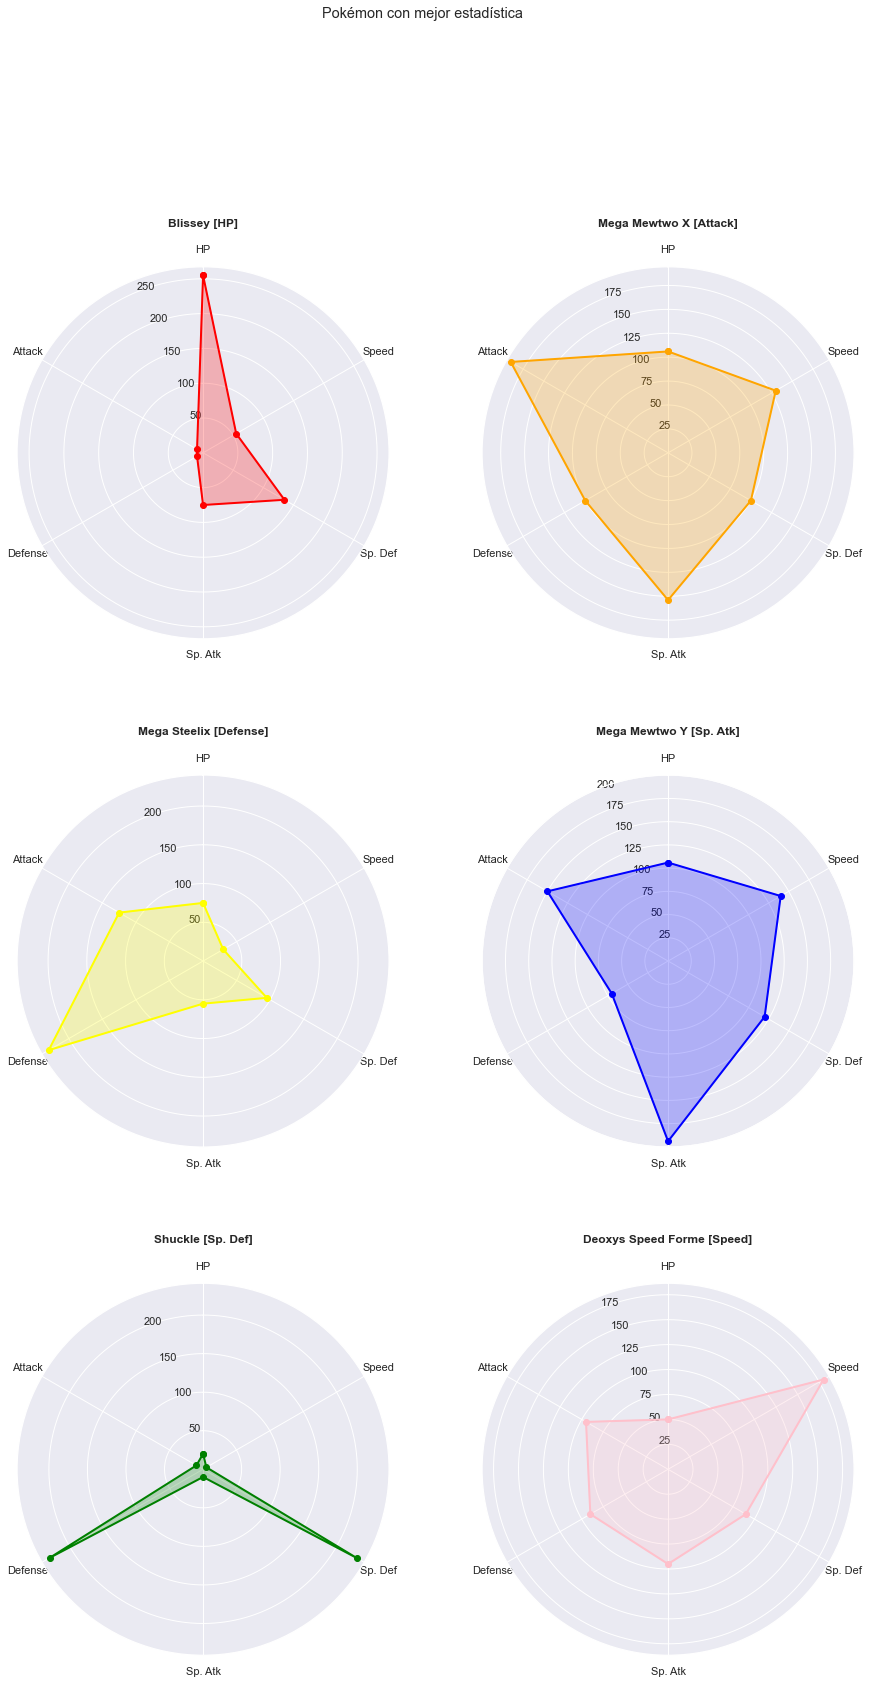

In [101]:
N = 6
theta = radar_factory(N, frame='circle')

fig, axs = plt.subplots(figsize=(15, 25), nrows=3, ncols=2,
                        subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

colors = ['red', 'orange', 'yellow', 'blue', 'green', 'pink']

poke_list = []

for i, stat in enumerate(df.columns[4:10]):
    pokemon = df.iloc[df[stat].idxmax()]
    stats = pokemon.iloc[4:10]
    labels = pokemon.iloc[4:10].index
    poke_list.append(pokemon['Name'])

    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))

    axs[int(i*6/12),i%2].plot(angles, stats, 'o-', linewidth=2, color=colors[i])
    axs[int(i*6/12),i%2].fill(angles, stats, alpha=0.25, color=colors[i])
    axs[int(i*6/12),i%2].set_thetagrids(angles * 180/np.pi, labels)
    axs[int(i*6/12),i%2].set_title(pokemon['Name'] + ' [' + stat + ']', weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
    axs[int(i*6/12),i%2].grid(True)
    
plt.suptitle('Pokémon con mejor estadística')

Debido a que en los resultados de la gráfica previa aparecen 3 Pókemon legendarios de los 6 representados y con unos valores más equilibrados en el resto de estadísticas, aparte de en la que sobresalen, se decide realizar una comparativa entre legendarios y no-legendarios.

En la gráfica inferior se realiza dicha comparación, que muestran claramente que tienen mejores estad´siticas en general que el resto de Pokémon. Sin embargo, los no-legendarios presentan muchos valores atípicos.

[(-10.0, 265.0)]

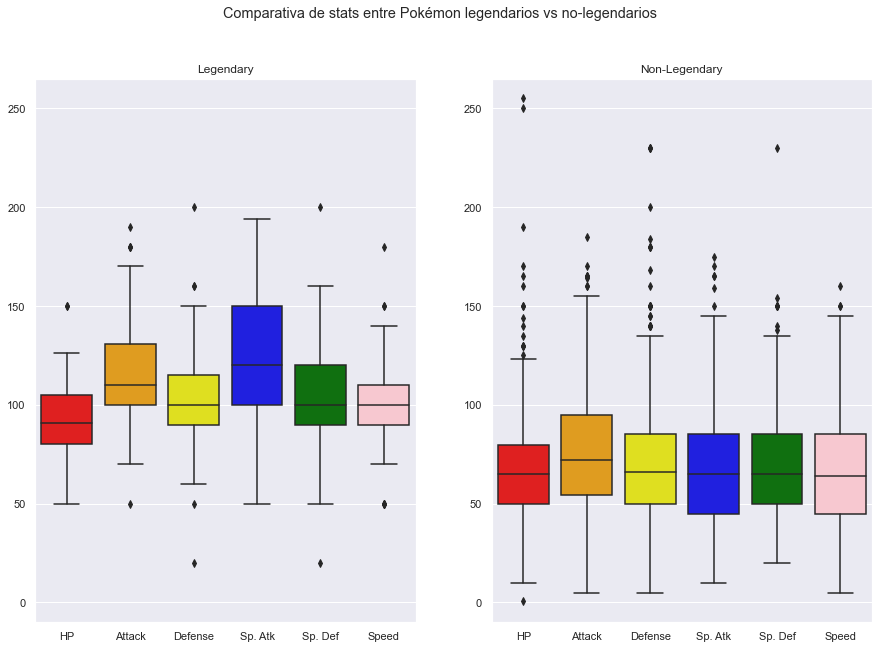

In [102]:
fig, axes = plt.subplots(1, 2, figsize = (15,10))

colors = ['red', 'orange', 'yellow', 'blue', 'green', 'pink']

df_legendaries = df[df['Legendary']==True]
df_non_legendaries = df[df['Legendary']==False]

plt.suptitle('Comparativa de stats entre Pokémon legendarios vs no-legendarios')
sns.boxplot(data=df_legendaries.iloc[:, 4:10], ax=axes[0], palette=colors)
axes[0].set_title('Legendary')
axes[0].set(ylim=(-10, 265))
sns.boxplot(data=df_non_legendaries.iloc[:, 4:10], ax=axes[1], palette=colors)
axes[1].set_title('Non-Legendary')
axes[1].set(ylim=(-10, 265))

Para descubrir quiénes son los Pokémon atípicos, vamos a empezar con una cuenta de cuántos de ellos son. El resultado es 343, cerca de la mitad. Debemos recordar que los atípicos pueden ser por excelencia o por mediocridad en cualquiera de sus estadísticas.

In [103]:
not_outliers = df.iloc[:, 4:10].apply(lambda x: np.abs(scipy.stats.zscore(x)) < 1.5).all(axis=1)
len(df[~not_outliers])

343

In [104]:
df[~not_outliers].describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,410.836735,75.346939,85.093294,83.017493,79.889213,79.204082,71.352770,3.329446,473.903790
std,223.648919,32.750595,41.133608,39.254899,41.095232,34.650288,35.984902,1.602057,146.109366
min,4.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,180.000000
25%,227.000000,50.000000,52.000000,55.000000,46.000000,53.000000,40.000000,2.000000,340.500000
50%,416.000000,72.000000,85.000000,80.000000,74.000000,80.000000,70.000000,3.000000,500.000000
75%,593.500000,95.000000,115.000000,105.000000,110.000000,100.000000,100.000000,5.000000,580.000000
max,800.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.000000,780.000000


Al imprimir los primeros y últimos Pokémon de valores atípicos, encontramos varias Mega.

Los Pokémon Mega son una mejora de un Pokémon ya existente antes de la generación 6 o en ella misma en la que reciben una mejora de estadísticas, por lo que puede suponer un foco de atención para el tema en cuestión.

In [105]:
df[~not_outliers]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
12,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,1,False,630
13,14,Caterpie,Bug,NaN,45,30,35,20,20,45,1,False,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680


A continuación, se descubre que de todas las formas Mega de Pokémon, sólo 4 de ellas no disponen de valores atípicos en sus estadísticas.

In [106]:
outliers_mega = df[~not_outliers][df[~not_outliers]['Name'].str.contains('Mega')]
outliers_mega

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
12,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,1,False,630
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,495
23,24,Mega Pidgeot,Normal,Flying,83,80,80,135,80,121,1,False,579
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,1,False,590
87,88,Mega Slowbro,Water,Psychic,95,75,180,130,80,30,1,False,590
102,103,Mega Gengar,Ghost,Poison,60,65,80,170,95,130,1,False,600
137,138,Mega Pinsir,Bug,Flying,65,155,120,65,90,105,1,False,600


In [107]:
not_outliers_mega = df[not_outliers][df[not_outliers]['Name'].str.contains('Mega ')]
not_outliers_mega

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
124,125,Mega Kangaskhan,Normal,NaN,105,125,100,60,100,100,1,False,590
336,337,Mega Medicham,Fighting,Psychic,60,100,85,80,85,100,3,False,510
366,367,Mega Altaria,Dragon,Fairy,75,110,110,110,105,80,3,False,590
397,398,Mega Glalie,Ice,NaN,80,120,80,120,80,100,3,False,580


In [108]:
count_megas = len(outliers_mega)
count_legendaries = len(df[~not_outliers][df[~not_outliers]['Legendary']])
count_legendaries_not_outlier = len(df[not_outliers][df[not_outliers]['Legendary']])

Por lo tanto, procedemos a separar los Pokémon atípicos en 3 grupos, de manera que se puda ver el imapacto de las Mega, los legendarios y el resto en los outliers.

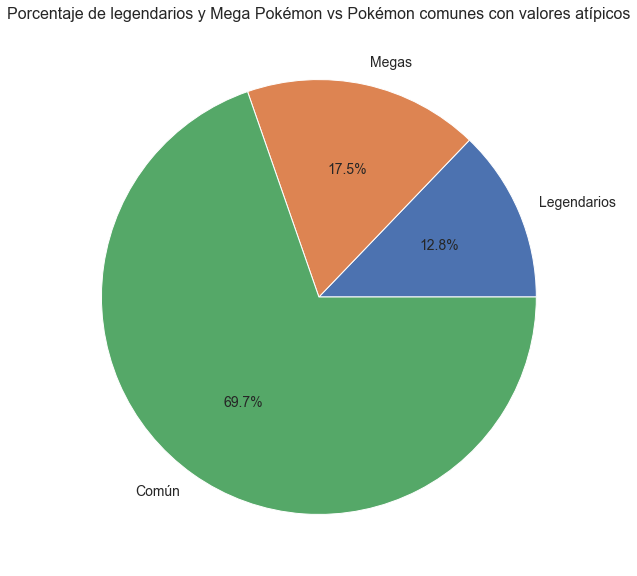

In [109]:
pie, ax = plt.subplots(figsize=(10, 10))
labels = ['Legendarios', 'Megas', 'Común']
plt.pie(x=[count_megas, count_legendaries, len(df[~not_outliers]) - (count_megas + count_legendaries)], autopct="%.1f%%", labels=labels, textprops={'fontsize': 14})
plt.title("Porcentaje de legendarios y Mega Pokémon vs Pokémon comunes con valores atípicos", fontsize=16);

También resulta de interés realizar, de la misma manera que con las Mega, un recuento de cuántos legendarios disponen de valores aítpicos. Sólo dan 5 legendarios que no suponen un outlier, representando el 7.7% de los legendarios.

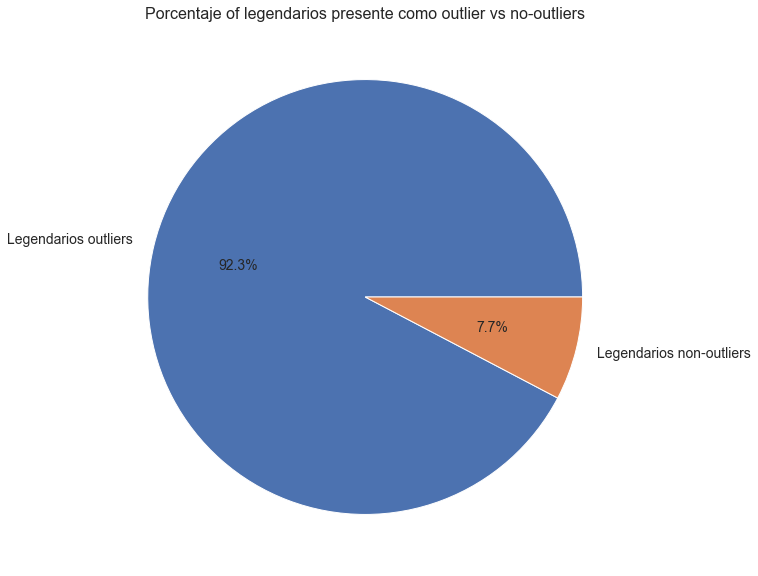

In [110]:
pie, ax = plt.subplots(figsize=(10, 10))
labels = ['Legendarios outliers', 'Legendarios non-outliers']
plt.pie(x=[count_legendaries, count_legendaries_not_outlier], autopct="%.1f%%", labels=labels, textprops={'fontsize': 14})
plt.title("Porcentaje of legendarios presente como outlier vs no-outliers", fontsize=16);

In [111]:
df[not_outliers][df[not_outliers]['Legendary']]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
427,428,Jirachi,Steel,Psychic,100,100,100,100,100,100,3,True,600
538,539,Mesprit,Psychic,NaN,80,105,105,105,105,80,4,True,580
550,551,Shaymin Land Forme,Grass,NaN,100,100,100,100,100,100,4,True,600
553,554,Victini,Psychic,Fire,100,100,100,100,100,100,5,True,600
708,709,Landorus Incarnate Forme,Ground,Flying,89,125,90,115,80,101,5,True,600


Para cerrar este apartado, se debe mencionar la importante cantidad de veces que el tipo dragón aparece con buenas estadísticas. Por otra parte, sabemos que los legendarios y las megas son foco de atipicidad de valores.

En la gráfica a continuación se representa legendarios y megas dragón vs no dragón, con el objetivo de ver cuánto impacta el tipo en estos outliers.

[(-10.0, 265.0)]

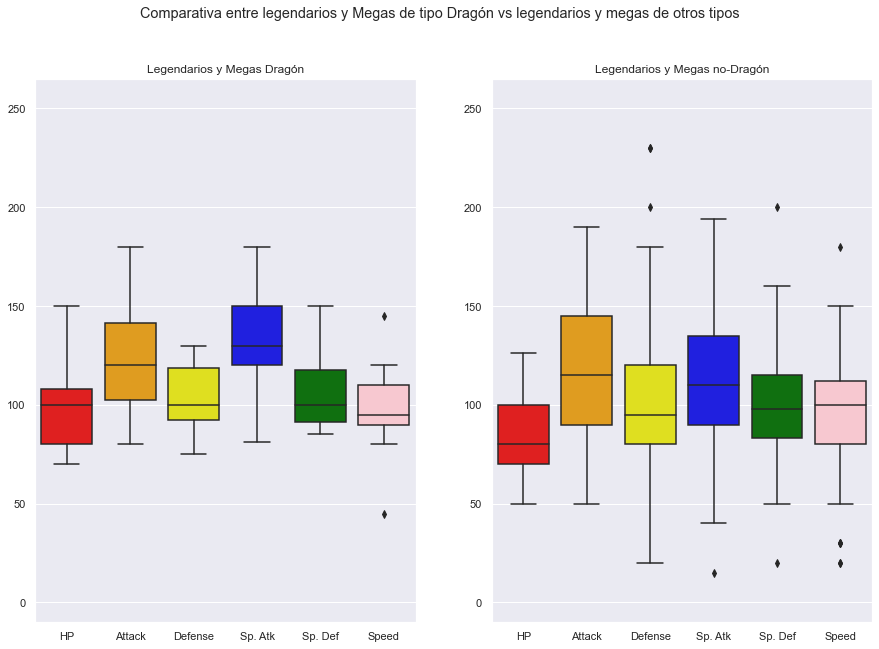

In [112]:
fig, axes = plt.subplots(1, 2, figsize = (15,10))

colors = ['red', 'orange', 'yellow', 'blue', 'green', 'pink']

df_dragons = df[(df['Legendary'] | df['Name'].str.contains('Mega ')) & ((df['Type 1'] == 'Dragon') | (df['Type 2'] == 'Dragon'))]
df_non_dragons = df[(df['Legendary'] | df['Name'].str.contains('Mega ')) & ((df['Type 1'] != 'Dragon') & (df['Type 2'] != 'Dragon'))]

plt.suptitle('Comparativa entre legendarios y Megas de tipo Dragón vs legendarios y megas de otros tipos')
sns.boxplot(data=df_dragons.iloc[:, 4:10], ax=axes[0], palette=colors)
axes[0].set_title('Legendarios y Megas Dragón')
axes[0].set(ylim=(-10, 265))
sns.boxplot(data=df_non_dragons.iloc[:, 4:10], ax=axes[1], palette=colors)
axes[1].set_title('Legendarios y Megas no-Dragón')
axes[1].set(ylim=(-10, 265))

El resultado es que los tipos dragón muestran ser ligeramentes superiores en cuanto a balance, sólo bajando la mediana de Speed de 100, mientras que los no-dragones tienen HP, Defense y Sp. Defense inferiores. También muestras que en general,no se quedan muy atrás de manera ofensiva.

## Correlación de los valores numéricos de los datos

Como último análisis, se realiza un mapa de calor en el que se representa el coeficiente de correlación de las distintas columnas de los datos ente ellas.

La única correlación fuerte y, en cierto sentido, obvia, es la relación entre #, que es el id del Pokémon y las generaciones de juegos.

La siguientes correlaciones destacables, si bien no son muy fuertes, son las de Defense y Sp. Defense entre ellas, además de Sp. Defense con Sp. Attack (probablemente como consecuencia de que los Pokémon Psíquicos llegan a tener en basatntes ocasiones dichos valores altos).

Otro comportamiento destacable es que existe un valor de correlación bastante bajo (en torno a 0.2) para las estadísticas que son ventajodas/desventajodas entre ellas en combate. Como ejemplo, Defense, que únicamente protege de Attack, tiene un coeficiente de correlación de 0.22 con Sp. Atk, mientras que con Attack tiene 0.44. Esto parece repetirse para todas las estadísticas, salvo Defense y Speed, que son muy bajos para considerar que existe alguna relación lineal.

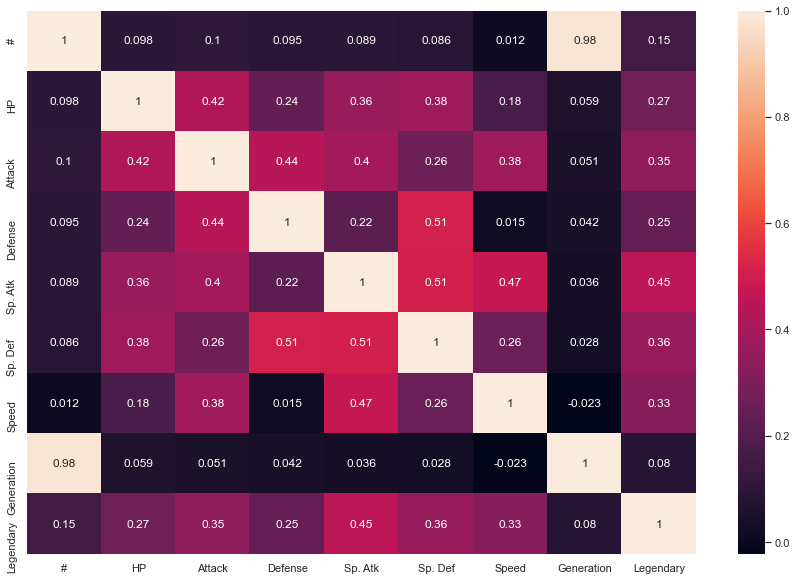

In [113]:
plt.figure(figsize=(15,10))
sns.heatmap(df_aux.corr(),annot=True) 

## Conclusiones

En este trabajo se ha desarrollado un análisis centrado en los tipos y estadísticas de los Pokémon de las generaciones 1 a 6, obteniéndose los tipos más/menos favorecidos en estadíticas debido a su tipoy valorando además que sean legendarios o megas.

Los resultados obtenidos indican que los legendarios y megas son bastantes mejores en cuanto stats que el resto, por ello, que existan normas específicas en el mundo competitivo de Pokémon. En un combate de 6 Pokémon, sólo 1 puede ser Mega y, si bien el resto puede ser legendarios, muchos de ellos están prohibidos.

Además, se realizó un breve análisis de la corellación entre atributos numéricos, dando las estadísticas ente sí no correlaciones muy altas.

Finalmente, es necsario resaltar la importancia de realizar un estudio de este tipo si se quisiera ir más allá y realizar procesos predictivos de combates, por ejemplo, ya que estos datos  proporcionarían validación a los resultados que se pudieran obtener.